In [ ]:
!pip install cvzone
!pip install mediapipe

In [ ]:
from cvzone.PoseModule import PoseDetector
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
image_path = 'photo.jpg'
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Вычисление средней яркости пикселей
mean_brightness = np.mean(gray_image)

if mean_brightness < 100:
    print("Изображение слишком темное. Требуется больше освещения.")
elif mean_brightness > 200:
    print("Изображение слишком яркое. Требуется снизить освещение.")
else:
    print("Освещение на изображении подходящее.")

Освещение на изображении подходящее.


In [ ]:
def count_brightness(frames):
  dark = 0
  optimal = 0
  bright = 0
  for frame in frames:
    gray_image = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    mean_brightness = np.mean(gray_image)
    if mean_brightness < 100:
        dark += 1
    elif mean_brightness > 200:
        bright += 1
    else:
        optimal += 1
  dark /= len(frames)
  optimal /= len(frames)
  bright /= len(frames)
  if dark >= optimal and dark >= bright:
    return 'dark'
  elif bright >= dark and bright >= optimal:
    return 'bright'
  else:
    return 'optimal'

In [ ]:
def get_all_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)
    cap.release()
    return frames

In [ ]:
def get_subarray(array, subset, ind):
  last_ind = min(ind+subset, len(array))
  return array[ind:last_ind]

In [ ]:
video_path = '1.mp4'
cap = cv2.VideoCapture(video_path)
frames = get_all_frames(video_path)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = len(frames)
video_duration_sec = total_frames / fps
frames_per_second = int(total_frames // video_duration_sec)
cap.release()
cv2.destroyAllWindows()

In [ ]:
detector = PoseDetector(staticMode=False,
                        modelComplexity=1,
                        smoothLandmarks=True,
                        enableSegmentation=False,
                        smoothSegmentation=True,
                        detectionCon=0.5,
                        trackCon=0.5)

In [ ]:
def point_between(point1, point2):
  return [(point1[0] + point2[0])/2, (point1[1] + point2[1])/2]

In [ ]:
def check_correct_pose(bounding_box, eye_coords, image_width, image_height):

    x_center = image_width // 2
    y_third_line = int(image_height / 3)
    x1, y1, x2, y2 = bounding_box['bbox']
    if abs(x1 + ((x2- x1) / 2) - x_center) > 0.2 * image_width:
        return 0

    # Проверка позиционирования глаз
    eye_x, eye_y = eye_coords
    if eye_y < y_third_line - 0.15 * image_height or eye_y > y_third_line + 0.15 * image_height:
        return 0

    return 1

In [ ]:
def count_angle(frames):
  incorrect_pose = 0
  for frame in frames:
    img = detector.findPose(frame, draw=False)
    lmList, bboxInfo = detector.findPosition(img, draw=False, bboxWithHands=False)
    right_coords = [lmList[5][0], lmList[5][1]]
    left_coords = [lmList[2][0], lmList[2][1]]
    width, height, _ = frame.shape
    incorrect_pose += 1 - check_correct_pose(bboxInfo, point_between(right_coords, left_coords), width, height)
  return incorrect_pose/len(frames)

In [ ]:
for i in range(0, total_frames, frames_per_second*10):
    second_frames = get_subarray(frames, frames_per_second*10, i)
    lightning = count_brightness(second_frames[::7])
    percent = count_angle(frames[::7])
    print(lightning, percent)

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
optimal 0.8108108108108109
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
optimal 0.8040540540540541
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
optimal 0.7972972972972973
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3

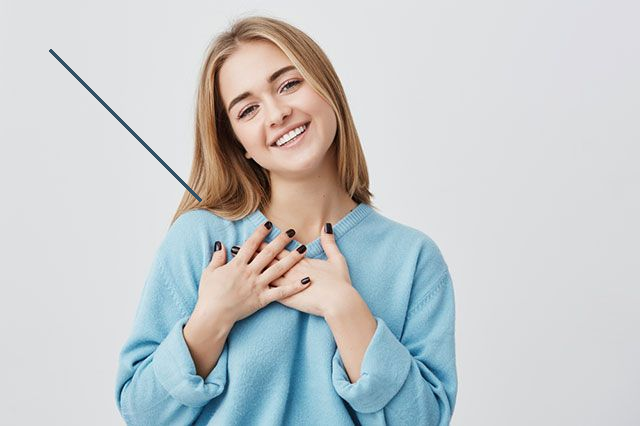

In [ ]:
import cv2
import numpy as np

# path
path = "nanotube_unit_cell.png"


image = cv2.imread(path)
image_orig=image.copy()

window_name = 'Image'

# Polygon corner points coordinates
pts = np.array([[25, 70], [25, 160],
                [110, 200], [200, 160],
                [200, 70], [110, 20]],
               np.int32)

pts = pts.reshape((-1, 1, 2))

isClosed = False

# Blue color in BGR
color = (255, 0, 0)

# Line thickness of 20 px
thickness = 20

# Using cv2.polylines() method
cv2.polylines(image, [pts], isClosed, color, thickness)

image_out=cv2.addWeighted(image, 0.3, image_orig, 0.7, 0.0) # 30%  картинки с линиями и 70% оригинальной
# Displaying the image
cv2.imshow('image', image_out)
cv2.waitKey(0)
cv2.imwrite('nanotube_unit_cell.png_after_cv.png', image_out)
cv2.destroyAllWindows()